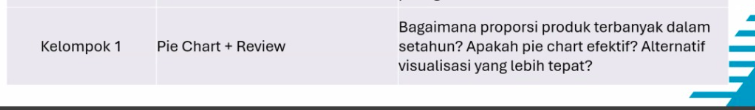

# 1. Memuat dan Mempersiapkan Data

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [18]:
df = pd.read_csv('dataset_penjualan_2024.csv')

### Menghitung total penjualan untuk setiap produk
### Kita mengelompokkan data berdasarkan 'Nama Produk' dan menjumlahkan 'Jumlah Terjual'

In [19]:
proporsi_produk = df.groupby('Produk_Terbanyak')['Total_Penjualan'].sum().sort_values(ascending=False)

In [20]:
print("Data Proporsi Produk:")
print(proporsi_produk)
print("\n" + "="*40 + "\n")

Data Proporsi Produk:
Produk_Terbanyak
A    60300
B    54200
C    34500
Name: Total_Penjualan, dtype: int64




# 2. Visualisasi dengan Pie Chart (Contoh yang Kurang Efektif)

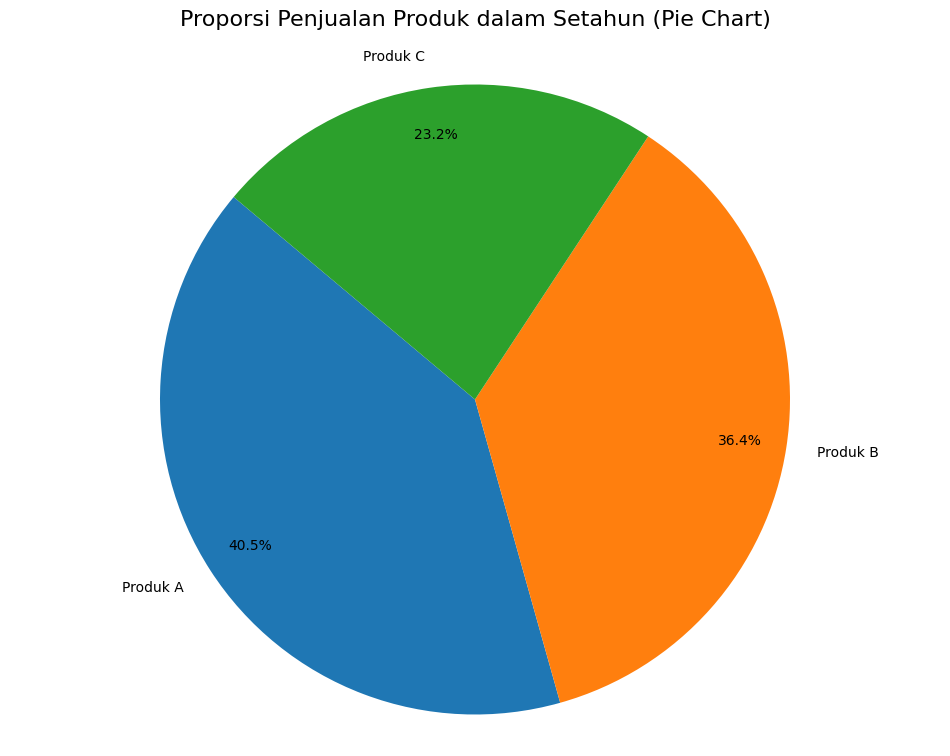

In [21]:
plt.figure(figsize=(12, 9))
plt.pie(
    proporsi_produk,
    labels=["Produk " + str(label) for label in proporsi_produk.index],
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85
)

fig = plt.gcf()
plt.title('Proporsi Penjualan Produk dalam Setahun (Pie Chart)', fontsize=16, pad=20)
plt.axis('equal')
plt.show()
print("\n" + "="*40 + "\n")

 # 3. Visualisasi dengan Bar Chart (Alternatif yang Lebih Tepat)

Menampilkan Bar Chart...


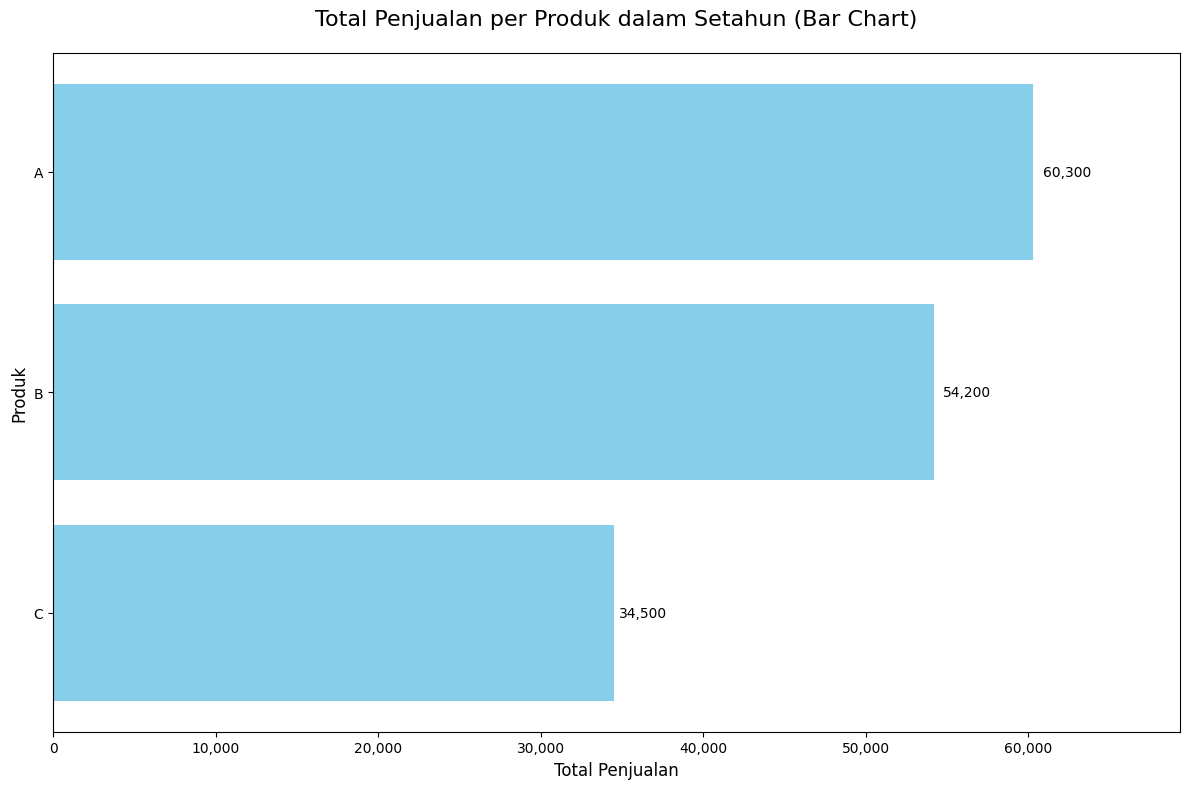

In [22]:
plt.figure(figsize=(12, 8))
bars = plt.barh(proporsi_produk.index, proporsi_produk.values, color='skyblue')

# Memberi judul dan label
plt.title('Total Penjualan per Produk dalam Setahun (Bar Chart)', fontsize=16, pad=20)
plt.xlabel('Total Penjualan', fontsize=12)
plt.ylabel('Produk', fontsize=12)

# Format angka pada sumbu-x
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Menambahkan label angka di ujung setiap bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + (width * 0.01), bar.get_y() + bar.get_height()/2, f'{int(width):,}', va='center')

# Membalik urutan sumbu-y
plt.gca().invert_yaxis()

# Atur batas kanan sumbu-X secara manual untuk mencegah error
if not proporsi_produk.empty:
    max_value = proporsi_produk.values[0]
    plt.xlim(right=max_value * 1.15)

# Memberi ruang agar label tidak terpotong
plt.tight_layout()

print("Menampilkan Bar Chart...")
plt.show()

# Kesimpulan
Berdasarkan analisis dan praktik terbaik dalam visualisasi data, **Bar Chart (grafik batang) adalah alternatif yang jauh lebih tepat dan efektif** dibandingkan Pie Chart untuk menunjukkan proporsi produk.

Berikut adalah alasannya:

### Kelemahan Pie Chart
1.  **Sulit untuk Membandingkan:** Mata manusia tidak pandai membandingkan besar sudut atau luas irisan kue secara akurat. Jika ada dua produk dengan proporsi yang mirip (misalnya 25% dan 28%), akan sangat sulit untuk melihat perbedaannya pada pie chart tanpa label angka.
2.  **Tidak Efektif untuk Banyak Kategori:** Jika Anda memiliki lebih dari 4 atau 5 produk, pie chart akan menjadi sangat berantakan, sulit dibaca, dan kehilangan fungsinya.
3.  **Membutuhkan Label:** Anda hampir selalu membutuhkan label persentase atau nilai absolut untuk membuat pie chart bisa dipahami, yang justru membuat grafiknya menjadi lebih ramai.

### Kelebihan Bar Chart
1.  **Perbandingan yang Mudah:** Grafik batang menggunakan panjang sebagai representasi nilai. Mata kita sangat mudah membandingkan panjang dua batang secara berdampingan. Anda bisa langsung melihat produk mana yang paling laku dan seberapa besar perbedaannya.
2.  **Menampilkan Peringkat dengan Jelas:** Dengan mengurutkan batang dari yang terpanjang hingga terpendek (seperti pada kode yang sudah dibuat), Anda bisa langsung melihat peringkat penjualan produk dengan sangat jelas.
3.  **Skalabilitas yang Baik:** Grafik batang dapat menangani lebih banyak kategori produk dengan lebih baik daripada pie chart tanpa menjadi terlalu berantakan.
4.  **Intuitif:** Ini adalah salah satu bentuk visualisasi yang paling mudah dipahami oleh hampir semua orang.

Meskipun pie chart populer, ia hanya efektif jika Anda memiliki 2-3 kategori dan ingin menekankan bahwa kategori-kategori tersebut adalah bagian dari satu kesatuan (100%). Untuk tujuan membandingkan proporsi produk terbanyak seperti dalam kasus Anda, **Bar Chart adalah pilihan yang tepat.**